In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')

In [3]:
# Reviewing Data Set
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [23]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
time_in_hospital             int64
number_emergency             int64
change                      object
diabetesMed                 object
readmitted                  object
dtype: object

In [58]:
# Cleaning Data - Drop Columns not needed
drop_cols=['admission_source_id',
          'payer_code',
           'weight',
          'medical_specialty',
          'num_lab_procedures',
          'num_procedures',
          'num_medications',
          'number_outpatient',
          'number_inpatient',
          'diag_1',
          'diag_2',
          'diag_3',
          'number_diagnoses',
          'max_glu_serum',
          'metformin',
          'repaglinide',
          'nateglinide',
          'chlorpropamide',
          'glimepiride',
          'acetohexamide',
          'glipizide',
          'glyburide',
          'tolbutamide',
          'pioglitazone',
          'rosiglitazone',
          'acarbose',
          'miglitol',
          'troglitazone',
          'tolazamide',
          'examide',
          'citoglipton',
          'insulin',
          'glyburide-metformin',
          'glipizide-metformin',
           'A1Cresult',
          'glimepiride-pioglitazone',
          'metformin-rosiglitazone',
          'metformin-pioglitazone'
]

In [59]:
#Data review/confirm dropped Columns
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,number_emergency,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,0,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,3,0,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,2,0,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,2,0,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,1,0,Ch,Yes,NO


In [60]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
time_in_hospital             int64
number_emergency             int64
change                      object
diabetesMed                 object
readmitted                  object
dtype: object

In [61]:
df.shape

(101766, 12)

In [62]:
df.describe

<bound method NDFrame.describe of         encounter_id  patient_nbr             race  gender      age  \
0            2278392      8222157        Caucasian  Female   [0-10)   
1             149190     55629189        Caucasian  Female  [10-20)   
2              64410     86047875  AfricanAmerican  Female  [20-30)   
3             500364     82442376        Caucasian    Male  [30-40)   
4              16680     42519267        Caucasian    Male  [40-50)   
...              ...          ...              ...     ...      ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)   
101763     443854148     41088789        Caucasian    Male  [70-80)   
101764     443857166     31693671        Caucasian  Female  [80-90)   
101765     443867222    175429310        Caucasian    Male  [70-80)   

        admission_type_id  discharge_disposition_id  time_in_hospital  \
0                       6               

In [63]:
#Review Counts by Age and Gender
df.groupby(['age', 'gender']).count()

encounter_id  patient_nbr   race  admission_type_id  \
age      gender                                                                 
[0-10)   Female                     83           83     83                 83   
         Male                       78           78     78                 78   
[10-20)  Female                    402          402    402                402   
         Male                      289          289    289                289   
[20-30)  Female                   1114         1114   1114               1114   
         Male                      543          543    543                543   
[30-40)  Female                   2162         2162   2162               2162   
         Male                     1613         1613   1613               1613   
[40-50)  Female                   4811         4811   4811               4811   
         Male                     4874         4874   4874               4874   
[50-60)  Female                   8572         8572   8572               8572   
         Male                     8684         8684   8684               8684   
[60-70)  Female                  11061        11061  11061              11061   
         Male                    11421        11421  11421              11421   
         Unknown/Invalid             1            1      1                  1   
[70-80)  Female                  13985        13985  13985              13985   
         Male                    12081        12081  12081              12081   
         Unknown/Invalid             2            2      2                  2   
[80-90)  Female                  10515        10515  10515              10515   
         Male                     6682         6682   6682               6682   
[90-100) Female                   2003         2003   2003               2003   
         Male                      790          790    790                790   

                          discharge_disposition_id  time_in_hospital  \
age      gender                                                        
[0-10)   Female                                 83                83   
         Male                                   78                78   
[10-20)  Female                                402               402   
         Male                                  289               289   
[20-30)  Female                               1114              1114   
         Male                                  543               543   
[30-40)  Female                               2162              2162   
         Male                                 1613              1613   
[40-50)  Female                               4811              4811   
         Male                                 4874              4874   
[50-60)  Female                               8572              8572   
         Male                                 8684              8684   
[60-70)  Female                              11061             11061   
         Male                                11421             11421   
         Unknown/Invalid                         1                 1   
[70-80)  Female                              13985             13985   
         Male                                12081             12081   
         Unknown/Invalid                         2                 2   
[80-90)  Female                              10515             10515   
         Male                                 6682              6682   
[90-100) Female                               2003              2003   
         Male                                  790               790   

                          number_emergency  change  diabetesMed  readmitted  
age      gender                                                              
[0-10)   Female                         83      83           83          83  
         Male                           78      78           78          78  
[10-20)  Female                        4

In [ ]:
#Research Question: Is there a change to readmissions when a medication change takes place? 

In [64]:
#Review counts by age and changes to medication
df.groupby(['age', 'change']).count()

encounter_id  patient_nbr   race  gender  admission_type_id  \
age      change                                                                
[0-10)   Ch                33           33     33      33                 33   
         No               128          128    128     128                128   
[10-20)  Ch               280          280    280     280                280   
         No               411          411    411     411                411   
[20-30)  Ch               846          846    846     846                846   
         No               811          811    811     811                811   
[30-40)  Ch              1771         1771   1771    1771               1771   
         No              2004         2004   2004    2004               2004   
[40-50)  Ch              4729         4729   4729    4729               4729   
         No              4956         4956   4956    4956               4956   
[50-60)  Ch              8269         8269   8269    8269               8269   
         No              8987         8987   8987    8987               8987   
[60-70)  Ch             10872        10872  10872   10872              10872   
         No             11611        11611  11611   11611              11611   
[70-80)  Ch             11832        11832  11832   11832              11832   
         No             14236        14236  14236   14236              14236   
[80-90)  Ch              7314         7314   7314    7314               7314   
         No              9883         9883   9883    9883               9883   
[90-100) Ch              1065         1065   1065    1065               1065   
         No              1728         1728   1728    1728               1728   

                 discharge_disposition_id  time_in_hospital  number_emergency  \
age      change                                                                 
[0-10)   Ch                            33                33                33   
         No                           128               128               128   
[10-20)  Ch                           280               280               280   
         No                           411               411               411   
[20-30)  Ch                           846               846               846   
         No                           811               811               811   
[30-40)  Ch                          1771              1771              1771   
         No                          2004              2004              2004   
[40-50)  Ch                          4729              4729              4729   
         No                          4956              4956              4956   
[50-60)  Ch                          8269              8269              8269   
         No                          8987              8987              8987   
[60-70)  Ch                         10872             10872             10872   
         No                         11611             11611             11611   
[70-80)  Ch                         11832             11832             11832   
         No                         14236             14236             14236   
[80-90)  Ch                          7314              7314              7314   
         No                          9883              9883              9883   
[90-100) Ch                          1065              1065              1065   
         No                          1728              1728              1728   

                 diabetesMed  readmitted  
age      change                           
[0-10)   Ch               33          33  
         No              128         128  
[10-20)  Ch              280         280  
         No              411         411  
[20-30)  Ch              846         846  
         No              811         811  
[30-40)  Ch             1771        1771  
         No             2004        2004  
[40-50)  Ch             4729        4729  


In [65]:
#Create new data fram --- age group > medication change 'Yes' > -readmission within 30 Days vs no medicaiton change > readmission within 30 days

In [66]:
df2 = df[['encounter_id', 'patient_nbr', 'age', 'change', 'time_in_hospital', 'readmitted']]

In [67]:
df2.head()

,encounter_id,patient_nbr,age,change,time_in_hospital,readmitted
0,2278392,8222157,[0-10),No,1,NO
1,149190,55629189,[10-20),Ch,3,>30
2,64410,86047875,[20-30),No,2,NO
3,500364,82442376,[30-40),Ch,2,NO
4,16680,42519267,[40-50),Ch,1,NO


<Axes: xlabel='age,change'>

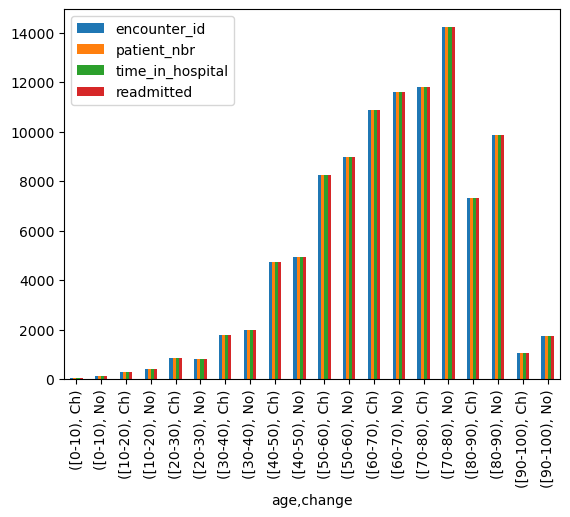

In [68]:
df2.groupby(['age', 'change']).count().plot(kind='bar')

In [69]:
df3 = df2[['age', 'change', 'readmitted']]

In [70]:
#Count of Readmissions related to age and change in medication
df3.groupby(['age', 'change']).count()

readmitted
age      change            
[0-10)   Ch              33
         No             128
[10-20)  Ch             280
         No             411
[20-30)  Ch             846
         No             811
[30-40)  Ch            1771
         No            2004
[40-50)  Ch            4729
         No            4956
[50-60)  Ch            8269
         No            8987
[60-70)  Ch           10872
         No           11611
[70-80)  Ch           11832
         No           14236
[80-90)  Ch            7314
         No            9883
[90-100) Ch            1065
         No            1728

In [71]:
df3.groupby(['age', 'readmitted']).count()

change
age      readmitted        
[0-10)   <30              3
         >30             26
         NO             132
[10-20)  <30             40
         >30            224
         NO             427
[20-30)  <30            236
         >30            510
         NO             911
[30-40)  <30            424
         >30           1187
         NO            2164
[40-50)  <30           1027
         >30           3278
         NO            5380
[50-60)  <30           1668
         >30           5917
         NO            9671
[60-70)  <30           2502
         >30           7897
         NO           12084
[70-80)  <30           3069
         >30           9475
         NO           13524
[80-90)  <30           2078
         >30           6223
         NO            8896
[90-100) <30            310
         >30            808
         NO            1675

In [72]:
df3.groupby(['age']).count()

,change,readmitted
age,,
[0-10),161,161
[10-20),691,691
[20-30),1657,1657
[30-40),3775,3775
[40-50),9685,9685
[50-60),17256,17256
[60-70),22483,22483
[70-80),26068,26068
[80-90),17197,17197


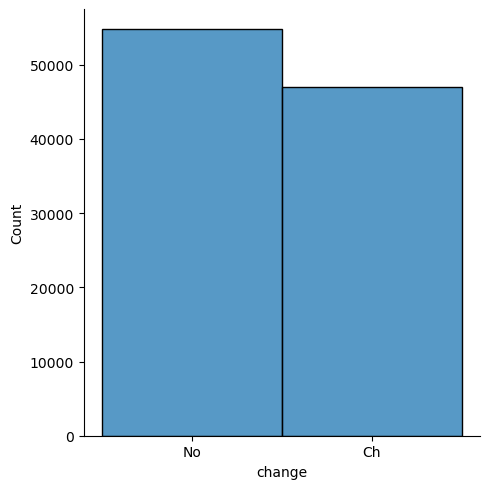

In [74]:
sns.displot(df3['change'])

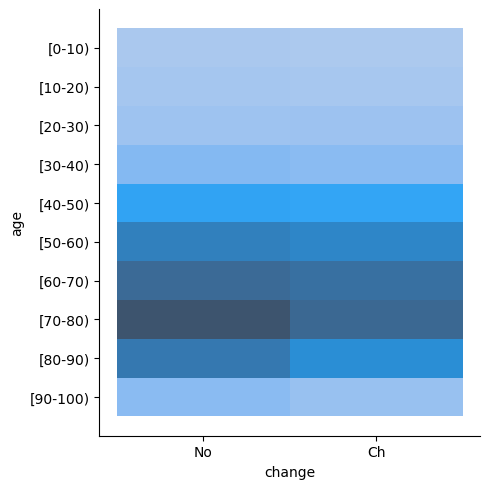

In [75]:
sns.displot(x=df3['change'], y=df3['age'])

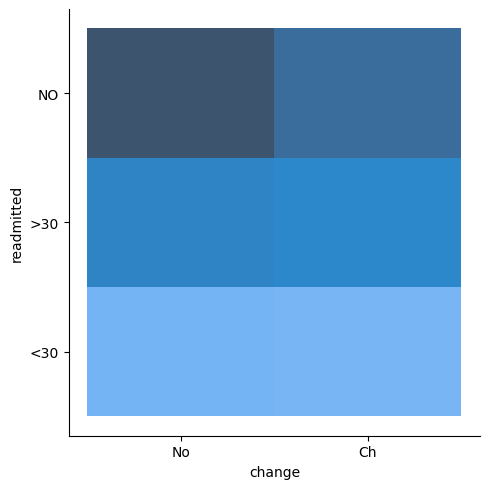

In [76]:
sns.displot(x=df3['change'], y=df3['readmitted'])

In [77]:
df4 = df3.loc[(df3.age == '[40-50)')]

In [93]:
df4.groupby(['age', 'change']).count()

readmitted
age     change            
[60-70) Ch           10872
        No           11611

<Axes: xlabel='age,change'>

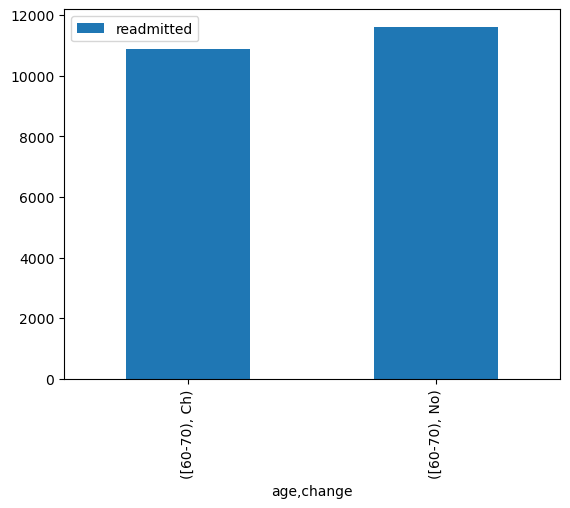

In [92]:
df4.groupby(['age', 'change']).count().plot(kind='bar')

In [84]:
df5 = df4.loc[(df3.age == '[60-70)')]

In [94]:
df5.groupby(['age', 'change']).count()

readmitted
age     change            
[60-70) Ch           10872
        No           11611

<Axes: xlabel='age,change'>

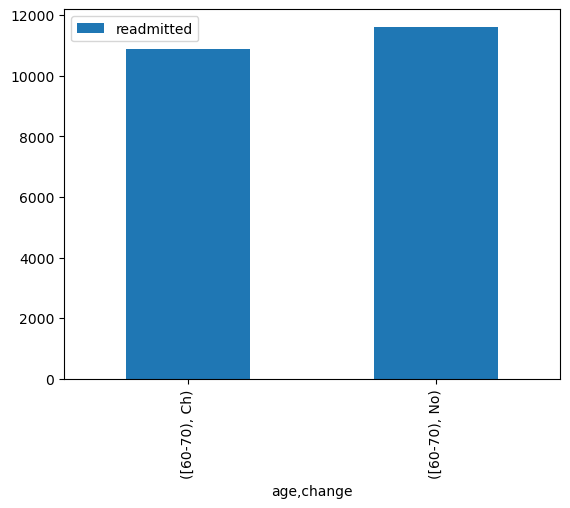

In [91]:
df5.groupby(['age', 'change']).count().plot(kind='bar')

<Axes: xlabel='age,change'>

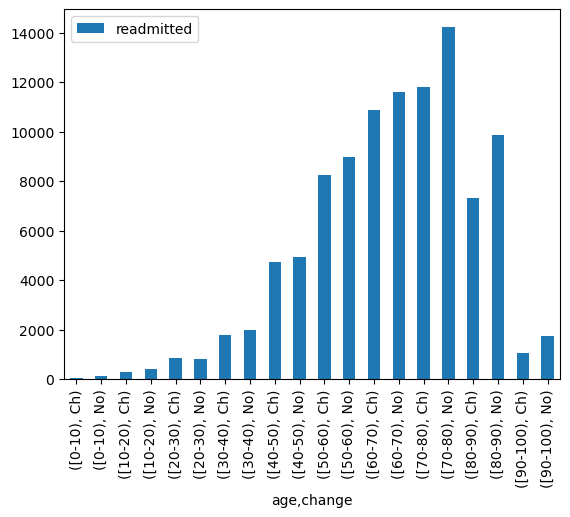

In [95]:
df3.groupby(['age', 'change']).count().plot(kind='bar')

In [82]:
# In summary there is a slight decrease in re-admissions when a medication change takes place during visit. 